In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import tensorflow as tf
import pandas as pd
from tensorflow import keras 

In [0]:
df = pd.read_csv("insurance.csv")

In [163]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [164]:
df = pd.read_csv("insurance.csv")
df.isnull().sum(axis = 0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [165]:
pd.crosstab(df['region'],df['sex'])


sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


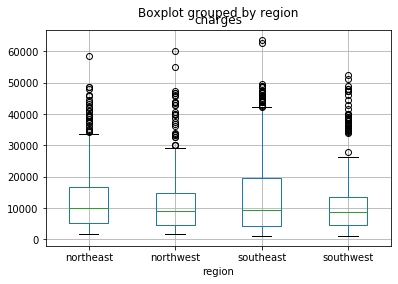

In [166]:
df.boxplot(column ='charges',by = 'region')

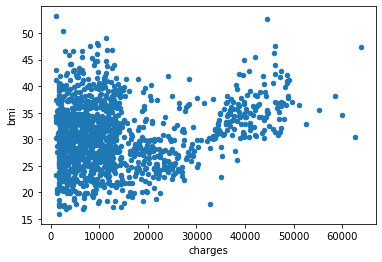

In [167]:
df.plot.scatter(x = 'charges',y = 'bmi')

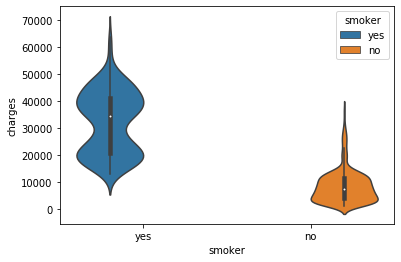

In [168]:
sea.violinplot(x= 'smoker',y = 'charges',data = df,hue = 'smoker')

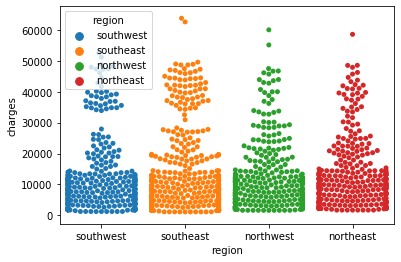

In [169]:
#swarm plot

sea.swarmplot(x = 'region', y = 'charges', data = df, hue = 'region')
plt.show()

In [170]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
train_data = df[0:1000]
test_data  = df[1000:1200]

In [0]:
y_train = train_data['charges']
y_test = test_data['charges']
train_data = train_data.drop(columns = 'charges')
test_data = test_data.drop(columns = 'charges')


In [173]:
train_data = train_data.replace({'sex':{'male':0,'female':1}})
train_data = train_data.replace({'smoker':{'yes':1,'no':0}})
train_data = train_data.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}})
train_data.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2


In [174]:
test_data = test_data.replace({'sex':{'male':0,'female':1}})
test_data  = test_data.replace({'smoker':{'yes':1,'no':0}})
test_data = test_data.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}})
test_data.head()

,age,sex,bmi,children,smoker,region
1000,30,0,22.99,2,1,2
1001,24,0,32.70,0,1,0
1002,24,0,25.80,0,0,0
1003,48,0,29.60,0,0,0
1004,47,0,19.19,1,0,3


In [0]:
X = train_data.to_numpy()
maximum_element = np.max(X,axis = 0)
X = X/maximum_element

In [0]:
Y = y_train.to_numpy()
maximum_Element = np.max(Y)
Y = Y/maximum_Element

In [177]:
model  =  keras.Sequential([keras.layers.Dense(units = 1,input_shape=[6]),keras.layers.Dense(units = 1),keras.layers.Dense(units = 1),keras.layers.Dense(units = 1)])
model.compile(optimizer = 'rmsprop',loss = 'mean_squared_error')
model.fit(X,Y,epochs = 100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 806us/sample - loss: 0.3880
Epoch 2/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.2375
Epoch 3/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.1547
Epoch 4/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.1084
Epoch 5/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0859
Epoch 6/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.0748
Epoch 7/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.0670
Epoch 8/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.0605
Epoch 9/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.0552
Epoch 10/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0510
Epoch 11/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.0476
Epoch 12/100
1000/

In [178]:
X = test_data.to_numpy()
Y = y_test.to_numpy()
X = X/maximum_element
Y = Y/maximum_Element
loss = model.evaluate(X,Y)


200/200 [==============================] - 0s 281us/sample - loss: 0.0101


In [0]:
predicted_y = model.predict(X)


In [0]:
predicted_y  = predicted_y *maximum_Element
actual_y = y_test.to_numpy()

In [0]:
actual_y  = actual_y.reshape(200,1)
k = np.linspace(1,2000,200)
predicted_y = predicted_y[0:25,0]
actual_y = actual_y[0:25,0]
k = np.linspace(1,26,25)

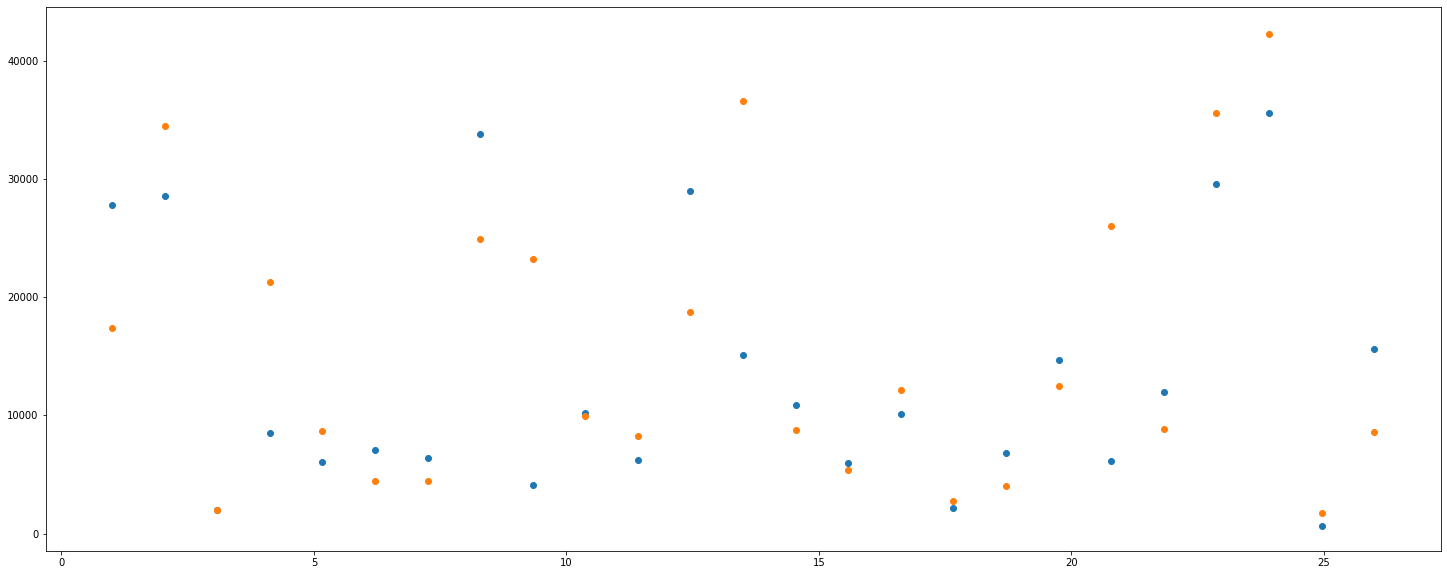

In [182]:
plt.figure(figsize=(25,10))
plt.scatter(k,predicted_y)
plt.scatter(k,actual_y)